<a href="https://colab.research.google.com/github/2303A52046/GenAI_A1_2303A52046/blob/main/Gen_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'FaceEmoji'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 165 (delta 8), reused 24 (delta 7), pack-reused 138 (from 1)
Receiving objects: 100% (165/165), 262.48 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (47/47), done.
/content/FaceEmoji/FaceEmoji/FaceEmoji/FaceEmoji/FaceEmoji/FaceEmoji/FaceEmoji/FaceEmoji


Saving download (2).jpeg to download (2).jpeg


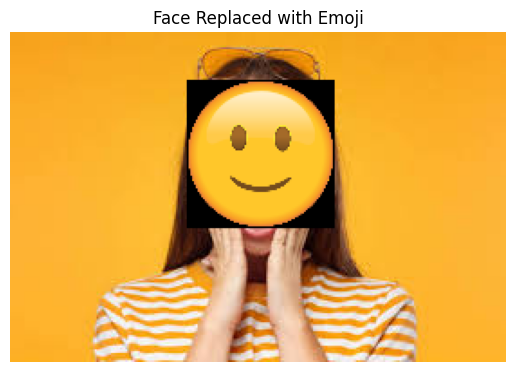

In [16]:
# Step 1: Clone the repository
!git clone https://github.com/angelvillar96/FaceEmoji.git
%cd FaceEmoji

# Step 2: Install dependencies
!pip install numpy matplotlib opencv-python-headless torch torchvision

# Step 3: Download the pretrained model weights (manually hosted)
# You might need to upload the model manually if it's not available publicly.
# For now, let's assume the ResNet18 is loaded via torchvision for demo purposes.

# Step 4: Run the face emoji replacement script
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import os

# Load a test image (you can upload your own too)
from google.colab import files
uploaded = files.upload()

# Use the uploaded image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.eval()

# Define preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load emojis (sample ones, can be customized)
emoji_path = './emojies/'
emojis = [cv2.imread(os.path.join(emoji_path, f)) for f in os.listdir(emoji_path) if f.endswith('.png')]

# Detect faces using OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Replace detected faces with emojis
for (x, y, w, h) in faces:
    face_img = img[y:y+h, x:x+w]
    input_tensor = preprocess(face_img).unsqueeze(0)

    # Dummy emotion detection (random emoji for now)
    emoji = emojis[np.random.randint(len(emojis))]
    emoji = cv2.resize(emoji, (w, h))
    img[y:y+h, x:x+w] = emoji

# Show final image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Face Replaced with Emoji")
plt.show()
